In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# PART 2A: Basic Logistic Regression 
In week two of the course we were introduced to another simple machine learning technique, logistic regression. This is very similar to linear regression (in the sense that its basically a bunch of linear algebra), but the use case here is classification rather than prediction.

There are a couple of technical differences when compared to linear regression, but the basic idea is the same: we wish to find the optimal parameters of our model theta that minimise our cost function. One key difference is that the "prediction function", h_theta(x) is replaced by:
![h2](img/h2.png)
where g(z) is the sigmoid function:
![sig](img/sig.png)

Here we define these in Python:

In [24]:
def sigmoid(z):
    return 1./(1.+np.exp((-1.)*z))

def h(theta,x):

    zz = np.sum(theta*np.transpose(x),axis=1)
    
    return sigmoid(zz)

Here's what the sigmoid function looks like:

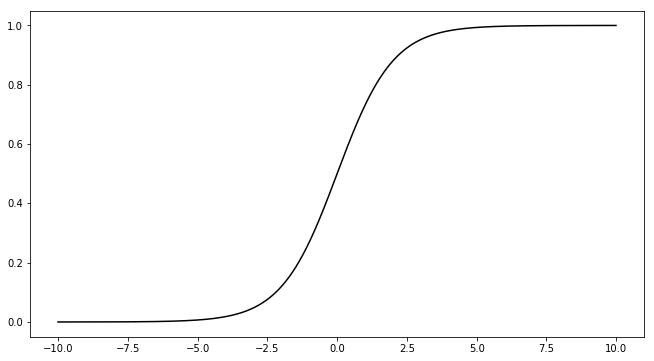

In [25]:
x = np.arange(-10,10,0.01)
y = sigmoid(x)

F = plt.figure(figsize=(11,6))
ax= F.add_subplot(111)
ax.plot(x,y,'k-')
plt.show()

The defining features of the sigmoid function are that it outputs values in the range 0-1, and sigmoid(0)=0.5. In the framework of machine learning you can think of the sigmoid function as a kind of on off switch. 

The input data for this example is a set of test scores on 2 exams and the value to predict is college admission. For example, based on student X's scores of S1 and S2 on exams 1 and 2, do we expect that their application will be accepted or rejected? Thus, the values to be predicted will be an array of 0's and 1's for rejected and accepted, respectively. In this case the cost function is slightly more complicated:
![cost2](img/cost2.png)
From this equation you can see for a student who is accepted (y=1), the second term is equal to zero. Assuming y=1, you want h_theta(x) to give 1, thus log(h_theta(x))=0 and the cost is 0. A similar train of thought can be followed for the second term where y=0.

Here's the cost function in python:

In [32]:
def cost(theta,x,y):

    f1 = (-1.)*y*np.log(h(theta,x))
    f2 = (y-1.)*np.log(1.-h(theta,x))
    return (1./float(len(y)))*np.sum(f1+f2)

We also require a gradient function, which in this case is identical (in form) to linear regression, except remember that h_theta(x) now includes the sigmoid function:
![grad2](img/grad2.png)
(which was included in our update rule for theta previously)

in python:

In [33]:
def grad(theta,x,y):
    return (1./float(len(y)))*np.sum((h(theta,x)-y)*x,axis=1)

Now lets have a look at the input data:

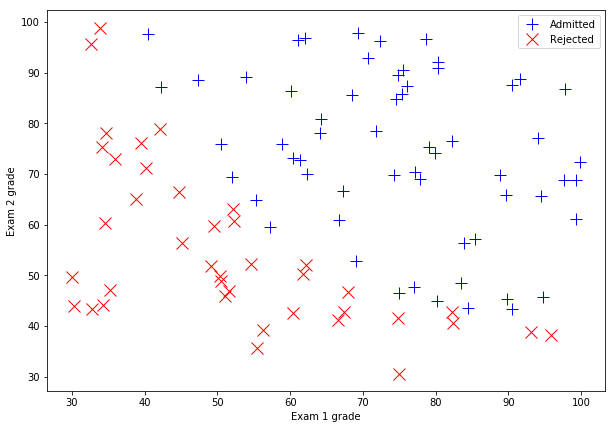

In [34]:
data = np.loadtxt('./ex2data1.txt',float,delimiter=',')
exam1,exam2,y = data[:,0],data[:,1],data[:,2]
# ADD BIAS TERM:
x = np.array([exam1*0.+1.,exam1,exam2])

ye,no = np.where(y == 1)[0],np.where(y == 0)[0]
F  = plt.figure(figsize=(10,7))
ax = F.add_subplot(111)
ax.plot(exam1[ye],exam2[ye],'b+',ms=12,label='Admitted')
ax.plot(exam1[no],exam2[no],'rx',ms=12,label='Rejected')
ax.set_xlabel('Exam 1 grade')
ax.set_ylabel('Exam 2 grade')
ax.legend()
plt.show()

It turns out that gradient descent is not the best optimization algorithm for higher dimensional datasets. We're going to instead use the scipy.optimize.minimize function with the truncated newton algorithm. To run this you simply input the observations, the expected results, the loss function and the gradient function:

In [35]:
# FIRST INITIALISE THE PARAMETER ARRAY THETA 
# AS A 3 ELEMENT ARRAY. THESE TERMS CORRESPOND TO
# THE BIAS TERM, EXAM 1 GRADE, and EXAM 2 GRADE:
T = np.array([0.,0.,0.])

Results = opt.minimize(fun = cost,
                           x0 = T,
                           args = (x,y),
                           method = 'TNC',
                           jac = grad)

opt_T = Results.x
print(f'Optimal Theta Values: {opt_T}')

Optimal Theta Values: [-25.16131856   0.20623159   0.20147149]


Now we can predict the probability of being accepted as:
sigmoid(z)
where z = theta_0 + (theta_1)x(exam 1 grade) + (theta_2)x(exam 2 grade)

In general, if sigmoid(z) >= 0.5, then we say the student is most likely to be accepted.

We can visualise the output of scipy.optimize.minimize in the following way:

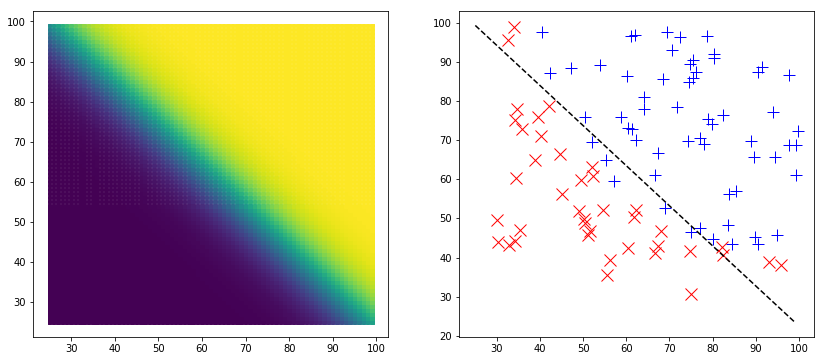

In [40]:
# CREATE A LINE CORRESPONDING TO EXAM SCORES WHERE THE PREDICTED 
# VALUE IS 0.5. THIS INDICATES THE SEPARATION BETWEEN REJECTION
# AND ACCEPTANCE
xx = np.arange(25,100,1.)
yy = ((-1.)/opt_T[2])*(opt_T[1]*xx+opt_T[0])

# CREATE A GRID OF X AND Y VALUES AND APPLY THE OPTIMAL THETA
xv,yv = np.meshgrid(xx,xx)
zz = opt_T[0]+opt_T[1]*xv+opt_T[2]*yv
hh = sigmoid(zz)

# PLOT THE RESULTS
F  = plt.figure(figsize=(14,6))
ax = F.add_subplot(121)
ax.scatter(xv,yv,12,c=hh,marker='s')

ax = F.add_subplot(122)
ax.plot(exam1[ye],exam2[ye],'b+',ms=12)
ax.plot(exam1[no],exam2[no],'rx',ms=12)
ax.plot(xx,yy,'k--')
plt.show()